In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
dict_model_score_train={}
dict_model_score_test={}
dict_acc_score={}
dict_percision_score={}
dict_recall_score={}
dict_f1_score={}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartDT_Filtered.csv to heartDT_Filtered.csv


In [ ]:
df_heart=pd.read_csv('/content/heartDT_Filtered.csv')


In [ ]:
df_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177,0


In [ ]:
X=df_heart.drop(['cardio'],axis=1)
y=df_heart['cardio']

In [ ]:
#split into train test

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#split train set into Base model train and base model test

In [ ]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = load_model('/content/heart_disease_FINAL.h5')


In [ ]:
X_base_test

array([[-0.48820347,  1.3652637 ,  0.45329067, ..., -0.23446677,
         0.4925753 , -0.6419131 ],
       [-0.19297077, -0.73245923, -0.05704942, ..., -0.23446677,
         0.4925753 ,  1.63228748],
       [-0.48820347, -0.73245923,  0.0705356 , ..., -0.23446677,
        -2.03014645,  1.47571337],
       ...,
       [ 0.10226193,  1.3652637 ,  0.70846072, ..., -0.23446677,
         0.4925753 , -0.14186093],
       [-1.96436696,  1.3652637 , -0.69497454, ..., -0.23446677,
         0.4925753 , -1.33282756],
       [-0.48820347, -0.73245923, -1.5880697 , ..., -0.23446677,
         0.4925753 , -0.52857975]])

In [ ]:
predictions_ANN = model.predict(X_base_test)

327/327 [==============================] - 1s 2ms/step


In [ ]:
predictions_ANN

array([[0.872832  ],
       [0.8588752 ],
       [0.8707221 ],
       ...,
       [0.3392817 ],
       [0.02849377],
       [0.31223127]], dtype=float32)

In [ ]:
predictions_ANN = np.where(predictions_ANN > 0.5, 1, 0)

In [ ]:
predictions_ANN

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
df_pred_ANN = pd.DataFrame(predictions_ANN, columns=['pred_ANN'])

In [ ]:
df_pred_ANN

,pred_ANN
0,1
1,1
2,1
3,0
4,0
...,...
10456,1
10457,0
10458,0
10459,0


In [ ]:
#XGboost Base Model Training

In [ ]:
param_space_XGB = {
    'n_estimators': 1000,
    'learning_rate': 0.024300796690854803,
    'max_depth': 3,
    'min_child_weight': 10,
    'subsample': 1.0,
    'colsample_bytree': 1.0
}

In [ ]:
num_round = 100

In [ ]:
model_XGB=XGBClassifier(**param_space_XGB)

In [ ]:
model_XGB.fit(X_base_train,y_base_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.024300796690854803,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction_XGB

In [ ]:
predictions_XGB = model_XGB.predict(X_base_test)

In [ ]:
predictions_XGB

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
df_pred_XGB = pd.DataFrame(predictions_XGB, columns=['pred_XGB'])

In [ ]:
df_pred_XGB

,pred_XGB
0,1
1,1
2,1
3,0
4,0
...,...
10456,1
10457,0
10458,0
10459,0


In [ ]:
#train SVC

In [ ]:
param_list_svc = {
    'C': 0.022244596968016832,
    'gamma': 0.7304576797154569,
    'kernel': 'poly',
     'degree': 3,
    'coef0':9.200092264373165,
}


In [ ]:
svc_model = SVC(**param_list_svc)

In [ ]:
svc_model.fit(X_base_train,y_base_train)

SVC(C=0.022244596968016832, coef0=9.200092264373165, gamma=0.7304576797154569,
    kernel='poly')

In [ ]:
predictions_SVC = svc_model.predict(X_base_test)


In [ ]:
predictions_SVC

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
predictions_SVC_1= pd.DataFrame(predictions_SVC, columns=['pred_SVC'])

In [ ]:
predictions_SVC_1


,pred_SVC
0,1
1,1
2,1
3,0
4,0
...,...
10456,1
10457,0
10458,0
10459,0


In [ ]:
#merge all base models predictions into one data frame

In [ ]:
df_meta_model_train=pd.concat([df_pred_ANN,df_pred_XGB,predictions_SVC_1],axis=1)

In [ ]:
df_meta_model_train

,pred_ANN,pred_XGB,pred_SVC
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0
...,...,...,...
10456,1,1,1
10457,0,0,0
10458,0,0,0
10459,0,0,0


In [ ]:
#meta model definition

In [ ]:
param_RF={
    'max_depth':10,
    'max_features': 'log2',
    'min_samples_leaf':11,
    'min_samples_split':3,
    'n_estimators':123
}


In [ ]:
model_Meta_RF = RandomForestClassifier(**param_RF)

In [ ]:
model_Meta_RF.fit(df_meta_model_train,y_base_test)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=11,
                       min_samples_split=3, n_estimators=123)

In [ ]:
#Base model for testing Data

In [ ]:
base_xgb_test=model_XGB.predict(X_test)

In [ ]:
base_svn_test=svc_model.predict(X_test)

In [ ]:
base_ann_test=model.predict(X_test)

409/409 [==============================] - 1s 2ms/step


In [ ]:
base_xgb_test

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
xgboost_test_base= pd.DataFrame(base_xgb_test, columns=['test_xgb'])

In [ ]:
xgboost_test_base

,test_xgb
0,0
1,1
2,1
3,0
4,1
...,...
13072,0
13073,1
13074,1
13075,0


In [ ]:
svn_test_base= pd.DataFrame(base_svn_test, columns=['test_svn'])

In [ ]:
svn_test_base

,test_svn
0,0
1,1
2,1
3,0
4,1
...,...
13072,0
13073,1
13074,1
13075,0


In [ ]:
base_ann_test = np.where(base_ann_test > 0.5, 1, 0)

In [ ]:
ann_test_base= pd.DataFrame(base_ann_test, columns=['test_ann'])

In [ ]:
ann_test_base

,test_ann
0,0
1,1
2,1
3,0
4,1
...,...
13072,0
13073,1
13074,1
13075,0


In [ ]:
#merge test_base_predictions

In [ ]:
df_base_test=pd.concat([xgboost_test_base,svn_test_base,ann_test_base],axis=1)

In [ ]:
df_base_test

,test_xgb,test_svn,test_ann
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
...,...,...,...
13072,0,0,0
13073,1,1,1
13074,1,1,1
13075,0,0,0


In [ ]:
#predit

In [ ]:
df_base_test = df_base_test.rename(columns={'test_xgb': 'pred_XGB'})

In [ ]:
df_base_test = df_base_test.rename(columns={'test_svn': 'pred_SVC'})

In [ ]:
df_base_test = df_base_test.rename(columns={'test_ann': 'pred_ANN'})

In [ ]:
df_base_test

,pred_XGB,pred_SVC,pred_ANN
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
...,...,...,...
13072,0,0,0
13073,1,1,1
13074,1,1,1
13075,0,0,0


In [ ]:
new_order= ['pred_ANN','pred_XGB','pred_SVC']

In [ ]:
df_base_test=df_base_test[new_order]

In [ ]:
df_base_test

,pred_ANN,pred_XGB,pred_SVC
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
...,...,...,...
13072,0,0,0
13073,1,1,1
13074,1,1,1
13075,0,0,0


In [ ]:
y_pred=model_Meta_RF.predict(df_base_test)

In [ ]:
print(y_pred)

[0 1 1 ... 1 0 0]


In [ ]:
y_pred.shape

(13077,)

In [ ]:
y_test

53455    0
62819    1
49269    1
30068    0
21808    0
        ..
42010    1
29594    0
45834    1
44824    1
56407    1
Name: cardio, Length: 13077, dtype: int64

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   74.76   |
| Model Test Score  |   73.11   |
|  Accuracy Score   |   73.11   |
|  Percision Score  |   73.21   |
|   Recall Score    |   73.11   |
|      F_Score      |   73.04   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6707
           1       0.74      0.68      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



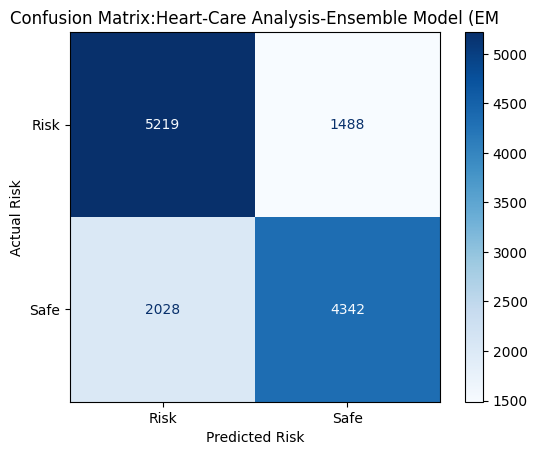

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_train = round(model_Meta_RF.score(df_meta_model_train,y_base_test) * 100, 2)
  model_score_test = round(model_Meta_RF.score(df_base_test, y_test) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['EM']=model_score_train
  dict_model_score_test['EM']=model_score_test
  dict_acc_score["EM"]=round(acc_score*100,2)
  dict_percision_score['EM']=round(pre_Score*100,2)
  dict_recall_score['EM']=round(rec_score*100,2)
  dict_f1_score['EM']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis-Ensemble Model (EM')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)